In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#%matplotlib inline
import csv
import multiprocessing
import os
pd.set_option('display.max_columns', 110)  

In [116]:
def create_year_plot(series, title_chem_fate_yaxis):
    plt.rcParams.update({
        'font.size'           : 16.0,
        'axes.titlesize'      : 'large',
        'axes.labelsize'      : 'medium',
        'xtick.labelsize'     : 'medium',
        'ytick.labelsize'     : 'medium',
        'legend.fontsize'     : 'large',
    })
    tcfy = title_chem_fate_yaxis
    fig, ax = plt.subplots()
    ax.plot(series)
    #rotate and align the tick labels so they look better
    fig.autofmt_xdate()
    ax.set_title(title_chem_fate_yaxis[0])
    ax.set_ylabel(tcfy[3])
    plt.savefig(f'figs/fig_chemicals_{tcfy[1].replace(" ", "_")}_{tcfy[2].replace(" ", "_")}.png')
#    plt.show()

In [3]:
def create_single_chem(path, file, names):
    print('creating single chems...')
    chems_file = path + file
    df = pd.read_csv(chems_file, low_memory=False)
    df_one = df[df['CHEMICAL']=='BENZENE']
    return df_one

In [4]:
def get_chem_names(path, name):
    file_path = path + name
    df = pd.read_csv(file_path, low_memory=False)
    return df['CHEMICAL'].unique()

In [200]:
path = '~/galvanize/capstone/1_cap/data/'
file_path = '~/galvanize/capstone/1_cap/data/'
chems_file = 'chems.csv'
chems = ['BENZENE', 'CREOSOTE', 'POLYCHLORINATED BIPHENYLS']
ac_file = '__all_chemical_names.csv'
#df = create_single_chem(file_path, chems_file, chems)

In [6]:
# for name in chems:
#     df_one = df[df['CHEMICAL']==name]
#     full_path = path+'_'+name.replace(' ','_').lower()+'.csv'
#    print(full_path)
#    df_one.to_csv(full_path)

In [7]:
def get_one_chem(path, name):
    file_path = path+'_'+name.replace(' ', '_').lower()+'.csv'
    df = pd.read_csv(file_path, low_memory=False)
    return df

In [202]:
def get_chem_names(path, name):
    file_path = path + name
    df = pd.read_csv(file_path, low_memory=False)
    return df['CHEMICAL'].unique()
all_chemicals = sorted(get_chem_names(file_path, ac_file))

In [9]:
# df_ac = pd.DataFrame({'CHEMICAL':all_chemicals})

In [193]:
#all_chemicals

In [10]:
#df_ac
ac_path = path + '__all_chemical_names.csv'

In [11]:
# df_ac.to_csv(ac_path)# chems_file = path + file

In [12]:
#all_chemicals
ac_path

'~/galvanize/capstone/1_cap/data/__all_chemical_names.csv'

In [13]:
small_fates = ['5.1_FUGITIVE_AIR'] # p=5-7
small_fates = ['5.2_STACK_AIR'] # p=2-7
small_fates = ['5.3_WATER'] # p=1-6

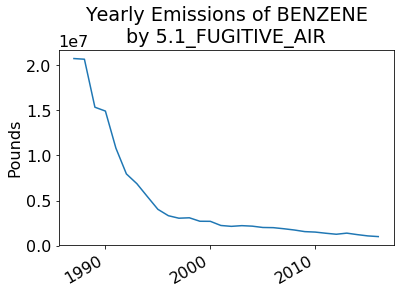

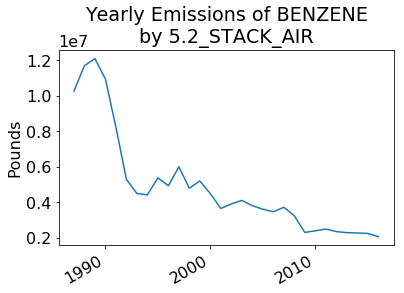

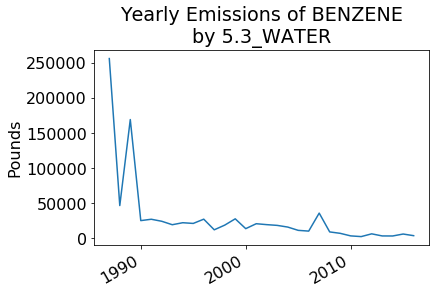

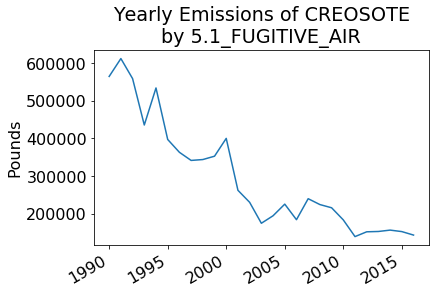

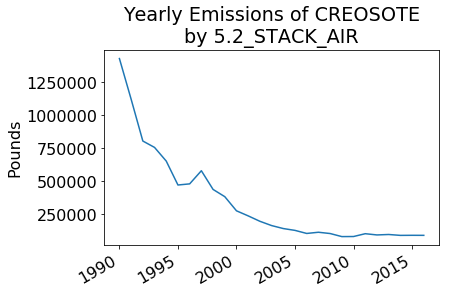

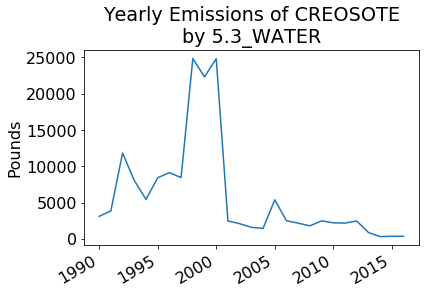

In [119]:
power = 3
is_small_chems = 0
is_small_fates = 1
df_fates = get_one_chem(file_path, 'BENZENE')
fates = df_fates.columns[list(df_fates.columns).index('5.1_FUGITIVE_AIR'):]
all_chemicals = get_chem_names(file_path, ac_file)

if is_small_chems:
    all_chemicals = chems
if is_small_fates:
    fates = small_fates

min_emit = 10**power
inner_dict = {}
fate_dict = {}
for x, chem in enumerate(all_chemicals):
    x_chem = x
    df_test = get_one_chem(file_path, chem)
    for i, fate in enumerate(fates[0:len(fates)]):
        fate_series = df_test.groupby("YEAR")[fate]
        title = f'Yearly Emissions of {chem}\nby {fate}'
        yaxis = 'Pounds'
        t_c_f_y = [title, chem, fate, yaxis]
        fsum_mean = np.mean(list(fate_series.sum()))
        if fsum_mean > min_emit:
            inner_dict[fate] = [fate_series.sum(), t_c_f_y]
            create_year_plot(fate_series.sum(), t_c_f_y)
    if bool(inner_dict):
        fate_dict[chem] = inner_dict
        inner_dict = {}        

In [204]:
list(all_chemicals)

['1,1,1,2-TETRACHLORO-2-FLUOROETHANE',
 '1,1,1,2-TETRACHLOROETHANE',
 '1,1,1-TRICHLOROETHANE',
 '1,1,2,2-TETRACHLORO-1-FLUOROETHANE',
 '1,1,2,2-TETRACHLOROETHANE',
 '1,1,2-TRICHLOROETHANE',
 '1,1-DICHLORO-1,2,2,3,3-PENTAFLUOROPROPANE',
 '1,1-DICHLORO-1,2,2-TRIFLUOROETHANE',
 '1,1-DICHLORO-1-FLUOROETHANE',
 '1,1-DIMETHYL HYDRAZINE',
 '1,2,3-TRICHLOROPROPANE',
 '1,2,4-TRICHLOROBENZENE',
 '1,2,4-TRIMETHYLBENZENE',
 '1,2-BUTYLENE OXIDE',
 '1,2-DIBROMO-3-CHLOROPROPANE',
 '1,2-DIBROMOETHANE',
 '1,2-DICHLORO-1,1,2-TRIFLUOROETHANE',
 '1,2-DICHLORO-1,1,3,3,3-PENTAFLUOROPROPANE',
 '1,2-DICHLORO-1,1-DIFLUOROETHANE',
 '1,2-DICHLOROBENZENE',
 '1,2-DICHLOROETHANE',
 '1,2-DICHLOROETHYLENE',
 '1,2-DICHLOROPROPANE',
 '1,2-DIPHENYLHYDRAZINE',
 '1,2-PHENYLENEDIAMINE',
 '1,3-BUTADIENE',
 '1,3-DICHLORO-1,1,2,2,3-PENTAFLUOROPROPANE',
 '1,3-DICHLOROBENZENE',
 '1,3-DICHLOROPROPYLENE',
 '1,3-PHENYLENEDIAMINE',
 '1,4-DICHLORO-2-BUTENE',
 '1,4-DICHLOROBENZENE',
 '1,4-DIOXANE',
 '1-(3-CHLOROALLYL)-3,5,7-TRIAZA-1-

In [235]:
chem = 'AMMONIA' 
chems = ['HYDROGEN SULFIDE', 'M-XYLENE','METHYL TERT-BUTYL ETHER',
 'METHYLENE BROMIDE','STYRENE','TOLUENE', 'TOLUENE DIISOCYANATE (MIXED ISOMERS)', 'TOLUENE-2,4-DIISOCYANATE','TOLUENE-2,6-DIISOCYANATE'
 ,'XYLENE (MIXED ISOMERS)']
fate = 'small_fates[0]'
fate = '5.1_FUGITIVE_AIR'
small_fates = ['5.1_FUGITIVE_AIR', '5.2_STACK_AIR']
is_small_chems = 1
is_small_fates = 1
df_fates = get_one_chem(file_path, 'BENZENE')
fates = df_fates.columns[list(df_fates.columns).index('5.1_FUGITIVE_AIR'):]
all_chemicals = get_chem_names(path, ac_file)

if is_small_chems:
    all_chemicals = chems
if is_small_fates:
    fates = small_fates
#all_chemicals=[chem]
#df.index.name='YEAR'
pounds_left = []
pounds_right = []
minn = 1000.
maxx = 100*minn
for chem in all_chemicals:
    print(chem)
    df_new = get_one_chem(path, chem)
    if df_new.empty:
        continue
    df_left = df_new[df_new['YEAR']<2002]
    df_right = df_new[df_new['YEAR']>=2002]
    for fate in fates[0:20]:
        pounds_left = []
        pounds_right  = []
        pounds_left.extend(list(df_left[df_left[fate]>0][fate]))
        pounds_right.extend(list(df_right[df_right[fate]>0][fate]))
        pounds_left = [x for x in pounds_left if x > minn]
        pounds_left = [x for x in pounds_left if x < maxx]
        pounds_right = [x for x in pounds_right if x > minn]
        pounds_right = [x for x in pounds_right if x < maxx]
        plot_two_hist(chem[0:4], fate[0:4], minn, maxx)
#         print(chem, fate)
#     max_left=max(pounds_left)
#     max_right=max(pounds_right)

# print(max_left, len(pounds_left))
# print(len(pounds_left))


HYDROGEN FLUORIDE
HYDROGEN SULFIDE
M-XYLENE
METHYL TERT-BUTYL ETHER
METHYLENE BROMIDE
OZONE
PENTACHLOROBENZENE
PENTACHLOROETHANE
STYRENE
TETRAFLUOROETHYLENE
TOLUENE
TOLUENE DIISOCYANATE (MIXED ISOMERS)
TOLUENE-2,4-DIISOCYANATE
TOLUENE-2,6-DIISOCYANATE
URETHANE
VINYL ACETATE
XYLENE (MIXED ISOMERS)


In [233]:
def plot_two_hist(chem, fate, minn, maxx):
    plt.rcParams.update({
        'font.size'           : 16.0,
        'axes.titlesize'      : 'large',
        'axes.labelsize'      : 'medium',
        'xtick.labelsize'     : 'medium',
        'ytick.labelsize'     : 'medium',
        'legend.fontsize'     : 'large',
    })
#    os.makedirs(f'figs/hist/{chem.replace(" ", "_")}', exist_ok=True)
    bins = np.linspace(minn, maxx, 100)
    plt.hist(pounds_left, bins, alpha=0.4, label='1987-2002')
    plt.hist(pounds_right, bins, alpha=0.7, label='2003-2016')
    plt.title(f'{chem} discharges by {fate}')
    plt.legend(loc='upper right')
    plt.savefig(f'figs/hist/fig_2Hist_L2_{chem.replace(" ", "_")}_{fate.replace(" ", "_")}.png')
#     plt.show()
    plt.close()

In [175]:
#plt.hist(pounds_left, bins=50)

In [176]:
#plt.hist(pounds_right, bins=50)

In [156]:
def create_hist_plot(left, right, title_chem_fate_yaxis):
    plt.rcParams.update({
    'font.size'           : 20.0,
    'axes.titlesize'      : 'large',
    'axes.labelsize'      : 'medium',
    'xtick.labelsize'     : 'medium',
    'ytick.labelsize'     : 'medium',
    'legend.fontsize'     : 'large',
})
    bins = np.histogram(np.hstack((left, right)), bins=40)[1] #get the bin edges
    plt.hist(left, bins)
   # plt.hist(right, bins)
    tcfy = title_chem_fate_yaxis
#     fig, ax = plt.subplots()
#     ax_left.plot.hist(left)
#     ax_right.plot.hist(right)
#     #rotate and align the tick labels so they look better
#     fig.autofmt_xdate()
#     ax.set_title(title_chem_fate_yaxis[0])
#     ax.set_ylabel(tcfy[3])
#    plt.savefig(f'figs/fig_chemicals_{tcfy[1].replace(" ", "_")}_{tcfy[2].replace(" ", "_")}.png')
    plt.show()

In [37]:
p_left

[5.881272170925766e-05,
 0.0005175519510414675,
 0.0028230106420443677,
 0.010115788133992318,
 0.004234515963066552,
 0.003293512415718429,
 5.881272170925766e-05,
 0.0007695056508439272,
 0.0028230106420443677,
 7.528028378784981e-05,
 0.0037640141893924904,
 6.681125186171671e-05,
 0.0010703915351084894,
 5.881272170925766e-05,
 0.002093732892849573,
 1.1762544341851533e-06,
 0.13972679373508068,
 5.881272170925766e-05,
 0.05565800731677308,
 0.00030582615288813985,
 0.0028230106420443677,
 0.0006351773944599828,
 0.20702078041658697,
 0.0001649108716727585,
 5.881272170925766e-05,
 0.0007057526605110919,
 0.0013409300549710747,
 0.0004940268623577644,
 0.011762544341851533,
 3.5287633025554597e-06,
 5.881272170925766e-05,
 0.0005881272170925766,
 5.881272170925766e-05,
 0.06822275718273889,
 5.881272170925766e-05,
 0.019055321833799484,
 0.23525088683703066,
 2.3525088683703066e-07,
 1.6467562078592147e-06,
 0.004190759298114864,
 5.881272170925766e-05,
 0.00039992650762295213,
 0.

(array([3.8424e+04, 2.3600e+02, 7.2000e+01, 4.0000e+01, 2.0000e+01,
        1.2000e+01, 1.1000e+01, 1.5000e+01, 0.0000e+00, 2.0000e+00]),
 array([1.00e-07, 2.20e+05, 4.40e+05, 6.60e+05, 8.80e+05, 1.10e+06,
        1.32e+06, 1.54e+06, 1.76e+06, 1.98e+06, 2.20e+06]),
 <a list of 10 Patch objects>)

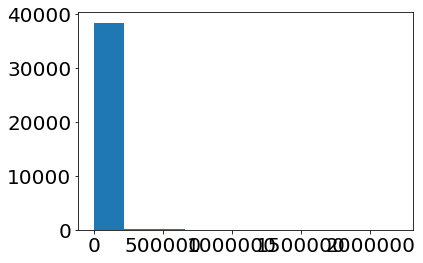

In [90]:
plt.hist(p_left)

In [ ]:
# x = p_left
# y = p_right
# bars = pd.DataFrame({'left': x, 'right': y})
# fig = plt.figure()
# ax = fig.add_subplot(111)
# #x.set_xlabel("Pounds", labelpad=20, weight='bold', size=12)
# x.plot(kind='hist', ax=ax)
# y.plot(kind='hist', ax=ax, color='red')


In [ ]:
#bars.plot.hist()

In [127]:
list(fates)

['5.1_FUGITIVE_AIR',
 '5.2_STACK_AIR',
 '5.3_WATER',
 '5.4_UNDERGROUND',
 '5.4.1_UNDERGROUND_CLASS_I',
 '5.4.2_UNDERGROUND_CLASS_II-V',
 '5.5.1_LANDFILLS',
 '5.5.1A_RCRA_C_LANDFILLS',
 '5.5.1B_OTHER_LANDFILLS',
 '5.5.2_LAND_TREATMENT',
 '5.5.3_SURFACE_IMPOUNDMENT',
 '5.5.3A_RCRA_C_SURFACE_IMP.',
 '5.5.3B_Other_SURFACE_IMP.',
 '5.5.4_OTHER_DISPOSAL',
 'ON-SITE_RELEASE_TOTAL',
 '6.1_POTW-TRANSFERS_FOR_RELEASE',
 '6.1_POTW-TRANSFERS_FOR_TREATM.',
 '6.1_POTW-TOTAL_TRANSFERS',
 '6.2_M10',
 '6.2_M41',
 '6.2_M62',
 '6.2_M71',
 '6.2_M81',
 '6.2_M82',
 '6.2_M72',
 '6.2_M63',
 '6.2_M66',
 '6.2_M67',
 '6.2_M64',
 '6.2_M65',
 '6.2_M73',
 '6.2_M79',
 '6.2_M90',
 '6.2_M94',
 '6.2_M99',
 'OFF-SITE_RELEASE_TOTAL',
 '6.2_M20',
 '6.2_M24',
 '6.2_M26',
 '6.2_M28',
 '6.2_M93',
 'OFF-SITE_RECYCLED_TOTAL',
 '6.2_M56',
 '6.2_M92',
 'OFF-SITE_RECOVERY_TOTAL',
 '6.2_M40',
 '6.2_M50',
 '6.2_M54',
 '6.2_M61',
 '6.2_M69',
 '6.2_M95',
 'OFF-SITE_TREATED_TOTAL',
 'TOTAL_RELEASES',
 '8.1_RELEASES',
 '8.1A_ON-SITE_CO

In [ ]:
fates[65]

In [ ]:
fate_dict.keys()

In [ ]:
list(fate_dict['BENZENE'].keys())

In [187]:
all_chemicals

['BENZENE']

In [ ]:
fates = ['5.1_FUGITIVE_AIR', '5.2_STACK_AIR', '5.3_WATER', '5.4_UNDERGROUND',
       '5.4.1_UNDERGROUND_CLASS_I', '5.4.2_UNDERGROUND_CLASS_II-V',
       '5.5.1_LANDFILLS', '5.5.1A_RCRA_C_LANDFILLS', '5.5.1B_OTHER_LANDFILLS',
       '5.5.2_LAND_TREATMENT', '5.5.3_SURFACE_IMPOUNDMENT',
       '5.5.3A_RCRA_C_SURFACE_IMP.', '5.5.3B_Other_SURFACE_IMP.',
       '5.5.4_OTHER_DISPOSAL', 'ON-SITE_RELEASE_TOTAL',
       '6.1_POTW-TRANSFERS_FOR_RELEASE', '6.1_POTW-TRANSFERS_FOR_TREATM.',
       '6.1_POTW-TOTAL_TRANSFERS', '6.2_M10', '6.2_M41', '6.2_M62', '6.2_M71',
       '6.2_M81', '6.2_M82', '6.2_M72', '6.2_M63', '6.2_M66', '6.2_M67',
       '6.2_M64', '6.2_M65', '6.2_M73', '6.2_M79', '6.2_M90', '6.2_M94',
       '6.2_M99', 'OFF-SITE_RELEASE_TOTAL', '6.2_M20', '6.2_M24', '6.2_M26',
       '6.2_M28', '6.2_M93', 'OFF-SITE_RECYCLED_TOTAL', '6.2_M56', '6.2_M92',
       'OFF-SITE_RECOVERY_TOTAL', '6.2_M40', '6.2_M50', '6.2_M54', '6.2_M61',
       '6.2_M69', '6.2_M95', 'OFF-SITE_TREATED_TOTAL', 'TOTAL_RELEASES',
       '8.1_RELEASES', '8.1A_ON-SITE_CONTAINED_REL.',
       '8.1B_ON-SITE_OTHER_RELEASES', '8.1C_OFF-SITE_CONTAINED_REL.',
       '8.1D_OFF-SITE_OTHER_RELEASES', '8.2_ENERGY_RECOVERY_ON-SITE',
       '8.3_ENERGY_RECOVERY_OFF-SITE', '8.4_RECYCLING_ON-SITE',
       ' 8.5_RECYCLING_OFF-SITE', '8.6_TREATMENT_ON-SITE',
       '8.7_TREATMENT_OFF-SITE', 'PROD._WASTE_(8.1_THRU_8.7)']